


# Wine reviews from the Wine Enthuthiast.
The dataset has been taken from [Kaggle](https://www.kaggle.com/zynicide/wine-reviews).

It is the scraping of 130k wine reviews from the WineEnthusiast.

The first column is an id, that holds duplicate function with the index created upon import, this column has been dropped for this study.

Data contains duplicate lines, after dropping the duplicates, it has 119 988 reviews remaining and 13 features.

We will classify the features as (see [Feature Description](#description))
- 2 numerical features : points and price
- 9 categorical features : winery, variety, country, province, region_1, region_2, taster_name , taster_twitter_handle and, designation 
- 2 text feature : title and description

This report will focus initially on the relationship between the points and price feature. In particular:
- [What is the price of quality ?](#price_quality) (as measured by the feature **points** for wines selected by the Wine Enthusiast)

- For Wine under \$47, [how does the price vary for similar quality whether the wine was produce in France or Italy](#the_match) ?

- As we have used the **points** feature as a absolute reference for wine quality, [it would be interesting to see the correlation between the reviewers and the rating](#correlations)

This initial analysis allowed us to see some trends in the data, confirming the positive correlation between rating and price. As the reviewers do not know the price of the wine at the moment of the review, this is an interesting results ([ref](https://www.jstor.org/stable/1251446?seq=1#page_scan_tab_contents)).

We considered the rating given (**points**) as a absolute value, a second study could look the features influencing the rating, but also using the **description** of the review, give more dimension to the measurement of the wine quality using Natural Languague Processing (NLP) for example.



In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from matplotlib.ticker import PercentFormatter, MultipleLocator
import matplotlib.patches as mpatches
import seaborn as sns

import os
#print(os.listdir("."))
#Change setting for the plotting
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 22})
# Any results you write to the current directory are saved as output.

In [3]:
dataset = pd.read_csv('winemag-data-130k-v2.csv');
print(dataset.shape)
print(dataset.columns)

(129971, 14)
Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')


In [4]:
## Drop first column that is an id (duplicate with the index of the dataframe.)
dataset.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [5]:
dataset.drop_duplicates(inplace=True)
print(dataset.shape)
print(dataset.columns)
print(dataset.info())
print(dataset.describe())


(119988, 13)
Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 119988 entries, 0 to 129970
Data columns (total 13 columns):
country                  119929 non-null object
description              119988 non-null object
designation              85443 non-null object
points                   119988 non-null int64
price                    111593 non-null float64
province                 119929 non-null object
region_1                 100428 non-null object
region_2                 46769 non-null object
taster_name              95071 non-null object
taster_twitter_handle    90542 non-null object
title                    119988 non-null object
variety                  119987 non-null object
winery                   119988 non-null object
dtypes: float64(1), int64(1), object(11)
memor

## Feature description
<a id='description'></a>

### Overview
Each row is the review of a particular wine, feature **title**, by a reviewer, feature **taster_name** and  **taster_twitter_handle**.

The review by itself consists of a **description** and a grade or rating, feature **point**.

Each wine is describe by its name, feature **title**, the **winery** that produced it, the **variety** (if it is a blend or a specific grape type).

Eeach wine is located by its **country**, **province** and region (feature **region_1**). For US wines, a second feature is given for the region, **region_2** that is different from the feature **region_1**.

In some cases (9 496 reviews), the **province** and the **region_1** are the same.

Lastly there is a feature that is specific to the site : **designation**.

Despite the clear selection bias that will be described below (in **points** and in **country**), we will use the rating (feature called **points**) has a proxy for the absolute quality of the wine. This has obvious limitations that will be discuss and will be an opportunity for further study taking into account the tasting note (feature **description**) made by the reviewer.

### Feature points (or rating)

All reviews have a rating (feature **points**).

The wines are rated on a scale of 1-100, but the reviews are not published if the rating is below 80.

The rating methodology is describe on the site as:
>All tastings reported in the Buying Guide are performed blind. Typically, products are tasted in peer-group flights of from 5–8 samples. Reviewers may know general information about a flight to provide context—vintage, variety or appellation—but never the producer or retail price of any given selection. When possible, products considered flawed or uncustomary are retasted.

In particular, the price of the wine is not know at the moment of the rating.

The rating is not considered to the an absolute value:
>Ratings reflect what our editors felt about a particular product. Beyond the rating, we encourage you to read the accompanying tasting note to learn about a product’s special characteristics.

The rating are describe as:
- 98–100 Classic The pinnacle of quality.
- 94–97 Superb A great achievement.
- 90–93 Excellent Highly recommended.
- 87–89 Very Good Often good value; well recommended.
- 83–86 Good Suitable for everyday consumption; often good value.
- 80–82 Acceptable Can be employed in casual, less-critical circumstances.

As noted previously, wine that are deemed to be worth less than 80 are not reviewed. There is therefore a clear selection bias in this dataset towards the wine that matchs the taste for the reviewers.

Despite this limitation, the size of the dataset is such that they are conclusion to be drawn from it.

The points are between 80 and 100, with a mean and median close to each other around 88.

Points are actually integer, and they are distributed closely to a normal distribution.




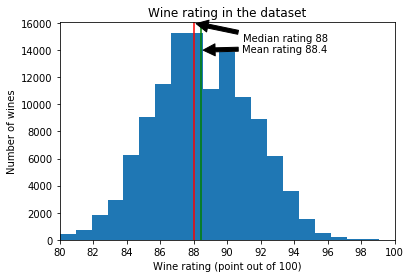

In [6]:
#rating is a rating as integer between 80 to 100, so there are 21 different values/
plt.hist(dataset.points,bins=(np.max(dataset.points) - np.min(dataset.points)+1));
median_point = np.median(dataset.points)
mean_point = np.mean(dataset.points)
plt.axvline(median_point,color="red")
plt.axvline(mean_point,color="green")
plt.title("Wine rating in the dataset")
plt.ylabel("Number of wines")
plt.xlabel("Wine rating (point out of 100)")
plt.xlim(80,100)

ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(2))


ax.annotate('Median rating %i'%median_point,
            xy=(median_point, 16000), xycoords='data',
                   xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top');
ax.annotate('Mean rating %.1f'%mean_point,
            xy=(mean_point, 14000), xycoords='data',
                xytext=(0.8, 0.90), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top');

### Feature description (aka tasting note)

There are no missing **description** in the dataset.

Those tasting note are given to give more context to the wine tasting.

This feature will be ignored in this report, but it should be the used in future study.


### Feature title

There are no missing **title** in the dataset.

There are 934 title that are mention more than once in reviews, affected reviews are only 2082.

Out of those 2082 reviews, 786 are for sparkling or Champagne blend (see **variety**).



In [7]:
all_titles = dataset.title.value_counts()
print(len(all_titles[all_titles>1]))
this_one = 0
print(all_titles[this_one:this_one+1].index[0],"===>",all_titles[this_one])
print(dataset[dataset.title.isin(all_titles[all_titles>1].index)].shape)
print(dataset[dataset.title.isin(all_titles[all_titles>1].index)&dataset.variety.str.contains('parkling|hampagne')].shape)
print(dataset[dataset.title.isin(all_titles[all_titles>1].index)&dataset.title.str.match('.*\D\d{4}\D.*')].iloc[0])
print(dataset[dataset.province==dataset.region_1].shape)
dataset[dataset.province==dataset.region_1][["title","country","province","region_1","region_2"]].sample(3)

934
Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County) ===> 9
(2082, 13)
(786, 13)
country                                                                 US
description              This blend of Sangiovese, Malbec, Cabernet Sau...
designation                                                          Siena
points                                                                  88
price                                                                   23
province                                                        California
region_1                                                     Sonoma County
region_2                                                            Sonoma
taster_name                                                 Virginie Boone
taster_twitter_handle                                              @vboone
title                        Ferrari-Carano 2014 Siena Red (Sonoma County)
variety                                                          Red Blend
winery       

,title,country,province,region_1,region_2
127256,Boomtown 2014 Chardonnay (Washington),US,Washington,Washington,Washington Other
56995,Domaine Albert Mann 2010 Hengst Grand Cru Pino...,France,Alsace,Alsace,NaN
58308,Le Cadeau 2011 Côte Est Pinot Noir (Oregon),US,Oregon,Oregon,Oregon Other


### Variety

There is only one missing value!

There are 707 different varieties.

To be noted, from previous remark review that have the same title, there are around 3000 reviews for sparkling or Champagne blend, out of those, 786 are from reviews with the same title.

We will initially drop any duplicate review with the same title.

Also, wine is a matter of "terroir", there are therefore some strong relationship between the **variety** and the location.

Typically `Portugese blend` are only available in Portugal, more than 95% of the `Nebbiolo` is from the `Piemont` province in `Italy`,  but `Bordeaux-style Red Blend` is available also in the US. 

We will therefore see some very strong correlation between the **variety** features and the geographic feature **country**, **province**, **region_1** and, **region_2**

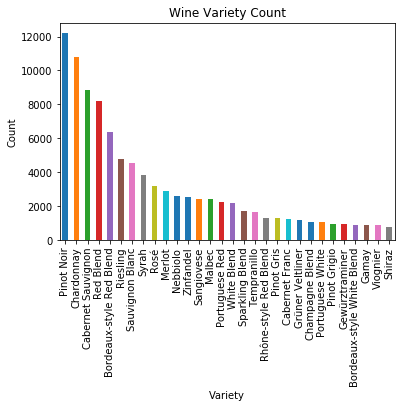

In [8]:
dataset.drop_duplicates(subset="title",inplace=True)
dataset.variety.value_counts()[:30].plot(kind = "bar")
plt.xlabel('Variety')
plt.ylabel('Count')
plt.title('Wine Variety Count');
dataset.variety.value_counts()[:30];

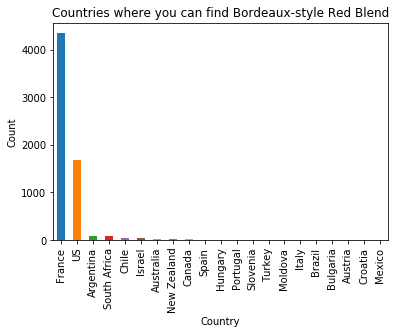

In [9]:
dataset[dataset.variety=="Bordeaux-style Red Blend"].country.value_counts().plot(kind="bar")
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Countries where you can find Bordeaux-style Red Blend');

### Geographic features **country**, **province**, **region_1** and, **region_2**

Each wine is identified were it has been winified (its **winery**).

There only 59 country and province information missing.

Wine is from a country, a province than region_1.

The region_2 feature is only available for US wines, but not for all wines from the US and it can be the same as region_1. 

Majority of the wine in this dataset is from the US.



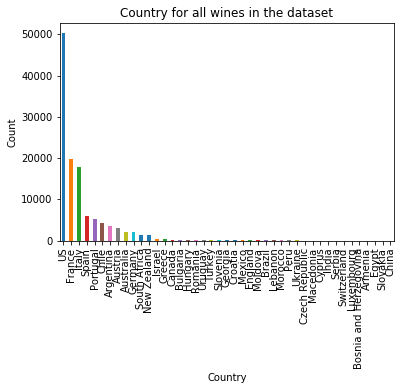

In [10]:
dataset.country.value_counts().plot(kind="bar");
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Country for all wines in the dataset');

## Price : missing data
Out of nearly 130k reviews, there is about 9000 missing price information.

Given the limited number of missing price information and that we will be mostly looking at relationship between price and rating, we will drop for the moment the line without price.

We can confirm the distribution of rating for the wine with no price is equivalent to the main distribution of rating, we are not therefore introducing a biase.

The price are taken from the Wine Enthutiast site and we will assume they need to be understood as price for the US customers, meaning in US Dollars and including the different importing cost for wine from abroad.

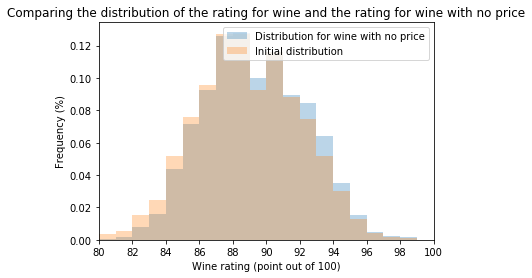

In [11]:
points_no_price = dataset[dataset.price.isna()]
_,bins,_ = plt.hist(points_no_price.points,density=True,alpha=0.3,bins=19,label="Distribution for wine with no price");
plt.hist(dataset.points,density=True,alpha=0.3,bins=bins,label="Initial distribution");



plt.title("Comparing the distribution of the rating for wine and the rating for wine with no price")
plt.ylabel("Frequency (%)")
plt.xlabel("Wine rating (point out of 100)")
plt.xlim(80,100)
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(2))


In [12]:
dataset = dataset[~dataset.price.isna()]

## Price: how is the distribution of the price ?
Contrary to the points, there is a wide variety in the prices, that varies from \$4 to \$3300, 80% of the prices being below \$ 48. The distribution of the wine price is close to a Pareto distribution.

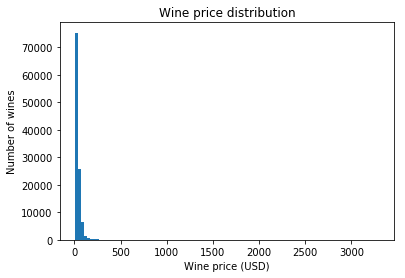

In [13]:
plt.hist(dataset.price,bins=100);
plt.title("Wine price distribution")
plt.ylabel("Number of wines")
plt.xlabel("Wine price (USD)");

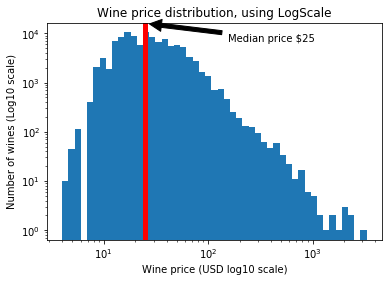

In [14]:
price_max = np.max(dataset.price)
price_median = np.median(dataset.price)
price_min = np.min(dataset.price)
plt.hist(dataset.price,bins=np.logspace(np.log10(price_min),np.log10(price_max)),log=True);

ax =plt.gca()
ax.set_xscale("log")
plt.axvline(price_median,color="red", linewidth=5)
ax.annotate('Median price $%i'%price_median,
            xy=(price_median, 16000), xycoords='data',
                   xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top');
plt.title("Wine price distribution, using LogScale");
plt.ylabel("Number of wines (Log10 scale)");
plt.xlabel("Wine price (USD log10 scale)");

# Is there a relationship between price and rating ?
<a id="price_quality"></a>

## The price of Quality.

For each rating, look at the quantile of the price (10%, 25%, 50% or median, 75% and 90%) to plot the zone of the prices for each rating.

This allow us to see that there is indeed a positive relationship between price and rating.

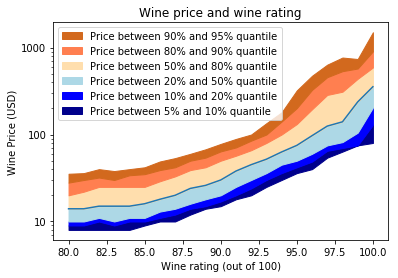

In [15]:
percentiles = [0.05,0.1,0.2,0.5,0.8,0.9,0.95]
#plt.scatter(normal_wine.points+np.random.choice([.5,-.5],len(normal_wine.points))*np.random.random(len(normal_wine.points)),normal_wine.price,s=1,marker=".",alpha=0.1,color="grey");
wine_slice = dataset[["points","price"]].groupby("points").price.quantile(percentiles)
#lines = list()
#for percentile in percentiles:
    
#lines.append(line)
line, = plt.semilogy(wine_slice.xs(0.5,level=1))
plt.title("Wine price and wine rating")
plt.ylabel("Wine Price (USD)")  
plt.xlabel("Wine rating (out of 100)")  
plt.yticks([10,100,1000], [10,100,1000])
colors_price = ["darkblue","blue","lightblue","navajowhite","coral","chocolate"]
legends = list()
for color,lower,upper in zip(colors_price,percentiles[:-1],percentiles[1:]):
    plt.fill_between(wine_slice.xs(lower,level=1).index, wine_slice.xs(lower,level=1),wine_slice.xs(upper,level=1),color=color)
    legends.append(mpatches.Patch(color=color, label='Price between %i%% and %i%% quantile'%(lower*100,upper*100)))

#plt.gca().xaxis.set_major_locator(MultipleLocator(2))
#plt.gca().yaxis.grid(True, linestyle='-', which='minor', color='lightgrey',
#               alpha=0.7,linewidth=1.2)
legends.reverse()
plt.legend(handles=legends)
plt.show()

# Looking at selecting the best "value for money".

The price distribution being very large ( 4 to 3300), it is not a practical set to be used to help decide what would be the best "value for money" for a wine.

We will now be looking at the case of a "normal" person, i.e. someone willing to pay for the 80% quantile of the price, meaning on this dataset a wine at less than \$47.

We will be looking at what property would give him the best "value for money".

This new normal_wine of wine for "normal" price, price varies between 4 to \$47.

In [16]:
normal_wine = dataset[dataset.price<dataset.price.quantile(0.80)]
print(normal_wine.describe())

             points         price
count  87488.000000  87488.000000
mean      87.684334     23.577245
std        2.766028     10.097389
min       80.000000      4.000000
25%       86.000000     15.000000
50%       88.000000     22.000000
75%       90.000000     30.000000
max       99.000000     47.000000


## Understanding the relation between rating and price for wine less than \$ 47

To help with this decision, let's divide the rating into 4 categories, using 25% Quantile, 50%, 75% of the rating and assign then to the categorie "Low", "Low-Med", "High-Med" and "High".

Looking at the distribution of wine under $47, when the price increase we are less likely to have a "Low" rating wine.

The likelyhood to get a "Low-Med" rating wine increase up too \$20 then decreases.

We can confirm that for those price range there is still a positive relationship between rating and price.


In [17]:
ratings = ["Low","Low-Med","High-Med","High"]
limits = [0,0.25,0.5,0.75,1]
bins = [normal_wine.points.quantile(limit) for limit in limits]
bins[0] = 79
normal_wine["Ratings"] = pd.cut(normal_wine.points,bins,labels=ratings);

/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


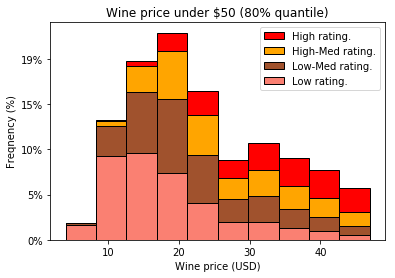

In [18]:

n, bins, patches = plt.hist([normal_wine[normal_wine.Ratings==a].price for a in ratings],density=True,stacked=True,edgecolor='black', linewidth=1,color=['salmon','sienna','orange',"red"]);
for patch,rating in zip(patches,ratings):
    patch.set_label("%s rating."%rating)
patches.reverse()
plt.legend(handles=patches)
plt.title("Wine price under $50 (80% quantile)")
plt.xlabel("Wine price (USD)")
plt.ylabel("Freqnency (%)")
xmax = max(sum(np.sum(a[i]) for a in n) for i in range(len(bins)-1))/np.sum(n)
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=xmax,decimals=0))

plt.show()


## Country of origin: Italy or France

The normal_wine mostly contains a significant amount of wine from the US, but also a large number of wine from France and Italy, in comparable numbers.

Let's try to see what would be the best "value for your money" choice between the 2 coutries.


In [19]:
limit = 7
per_country = normal_wine.country.value_counts()[:limit]
remaining  = normal_wine.country.value_counts()[limit:]
per_country["Other"]= sum(remaining)

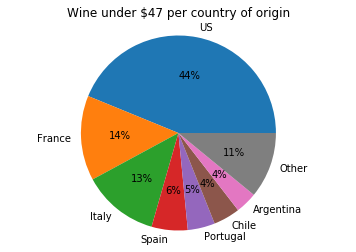

In [20]:

plt.pie(per_country,labels=per_country.index,autopct='%1.f%%')
ax = plt.gca()
ax.axis('equal')
plt.title("Wine under \$47 per country of origin");


## France-Italy the match : the cost of quality ?
<a id="the_match"></a>

To help the customer make his choice, for a similar group of rating, we will look at the price distribution using Boxplots.

For apart for the 1st Quartile for "Low-Med" rating, that is lower for Italy than for France, for all other metrics, France price are lower.

To be rephrase, for the same quality "banding", the price of the French wines is lower than the price of the Italy.

We can confirm this by using a one-tail t-test with the assumption that French wine are more expensive than italian wine in a given category. 

In [21]:
countries = ["France","Italy",]
ratings = ["Low","Low-Med","High-Med","High"]
labels = [(rating,country) for rating in ratings for country in countries]
limits = [0,0.25,0.5,0.75,1]
bins = [normal_wine.points.quantile(limit) for limit in limits]
bins[0] = 79
normal_wine["Ratings"] = pd.cut(dataset.points,bins,labels=ratings);


/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


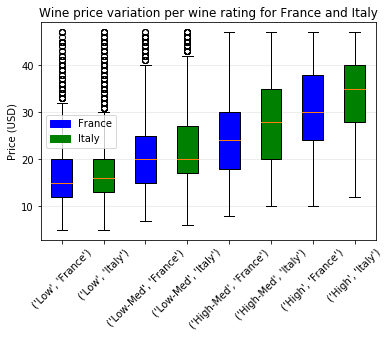

In [22]:
results = plt.boxplot([normal_wine[(normal_wine.Ratings==rating)&(normal_wine.country==country)].price for rating in ratings for country in countries],labels=labels,patch_artist=True);
# fill with colors
#colors = ['pink', 'lightblue', 'lightgreen',"yellow",'pink', 'lightblue', 'lightgreen',"yellow"]
colors = {"France": 'blue', 'Italy': 'Green'}
for patch,label in zip(results['boxes'],labels):
    patch.set_facecolor(colors[label[1]])
plt.xticks(rotation=45)
plt.gca().yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
legends = list()
for country,color in colors.items():
    legends.append(mpatches.Patch(color=color, label=country))

plt.legend(handles=legends)
# Hide these grid behind plot objects
plt.title('Wine price variation per wine rating for France and Italy')
#plt.xlabel('Wine rating (out of 100)')
plt.ylabel('Price (USD)')
plt.gca().set_axisbelow(True)
plt.show();

In [23]:
from scipy.stats import ttest_ind

In [24]:
italy  = normal_wine[(normal_wine.Ratings==rating)&(normal_wine.country=="Italy")].price
france = normal_wine[(normal_wine.Ratings==rating)&(normal_wine.country=="France")].price

print(ttest_ind(italy,france,equal_var=True))
print(ttest_ind(italy,france,equal_var=False))

Ttest_indResult(statistic=10.443197646158653, pvalue=3.8719190049916825e-25)
Ttest_indResult(statistic=10.5455532515777, pvalue=1.8223554002177829e-25)


In [31]:
rating = "Low-Med"
italy = normal_wine[(normal_wine.Ratings==rating)&(normal_wine.country=="Italy")].price
france =  normal_wine[(normal_wine.Ratings==rating)&(normal_wine.country=="France")].price
france += 1
ttest_ind(italy,france)

Ttest_indResult(statistic=3.4724715606924206, pvalue=0.000518446847328738)

# Categorical features

In [22]:
columns_to_categorize = list(dataset.select_dtypes(include='object').columns)
for col in ['description','designation','region_2','title','winery','taster_twitter_handle']:
    columns_to_categorize.remove(col)
data_all_num = dataset.copy()
for column in columns_to_categorize:
    dataset[column] = pd.Categorical( dataset[column])
    dfDummies = pd.get_dummies(dataset[column], prefix = column,drop_first=False)
    data_all_num.drop(labels=[column], axis=1,inplace=True)
    data_all_num = pd.concat([data_all_num,dfDummies], axis=1)

In [23]:

data_all_num = dataset.copy()
for column in columns_to_categorize:
    dataset[column] = pd.Categorical( dataset[column])
    dfDummies = pd.get_dummies(dataset[column], prefix = column,drop_first=False)
    data_all_num.drop(labels=[column], axis=1,inplace=True)
    data_all_num = pd.concat([data_all_num,dfDummies], axis=1)

In [24]:
data_all_num.drop(['description','designation','region_2','title','winery','taster_twitter_handle'],axis=1,inplace=True)

In [25]:
data_all_num.shape

(110581, 2386)

In [26]:
#Deleting columns with less than 200 values to reduce the noise.
to_drop = list()
for col in data_all_num.columns:
    if sum(data_all_num[col]) < 200:
        to_drop.append(col)
        

In [27]:
data_all_num.drop(labels=to_drop,axis=1,inplace=True)

In [28]:
data_all_num.shape

(110581, 237)

In [29]:
correlations = data_all_num.corr()

In [30]:
all_corr_sorted = correlations.copy()


In [31]:
cmap=sns.mpl_palette("Paired", 9)

## Correlation between categorical features and points
<a id="correlations"></a>
Categorical features have been transformed to boolean columns.

When the column has less than 200 values, it is dropped. We therefore create an implicit "Other" category for each feature.

### The reviewer and points correlation

For the moment, we have used the **points** has an absolute measurement of quality. 

It would be interesting to see potential correlation between the reviewer and the **points** features.

The 10 highest absolute value correlation displayed. As the correlation is calculated for each values, and there are 16 different tasters with more than 200 reviews, we absolute value of the correlation is low.

To confirm the difference, we draw the normalized distribution for the ratings for the reviewer with the highest positive correlation with rating (Matt Kettman) and the reviewer with the highest negative correlation with ratings (Michael Schachner).

We can graphically confirm the rating for those 2 reviewers a different, but are those difference due to a different nature of the wine being rewieved or from the reviewers themselves?


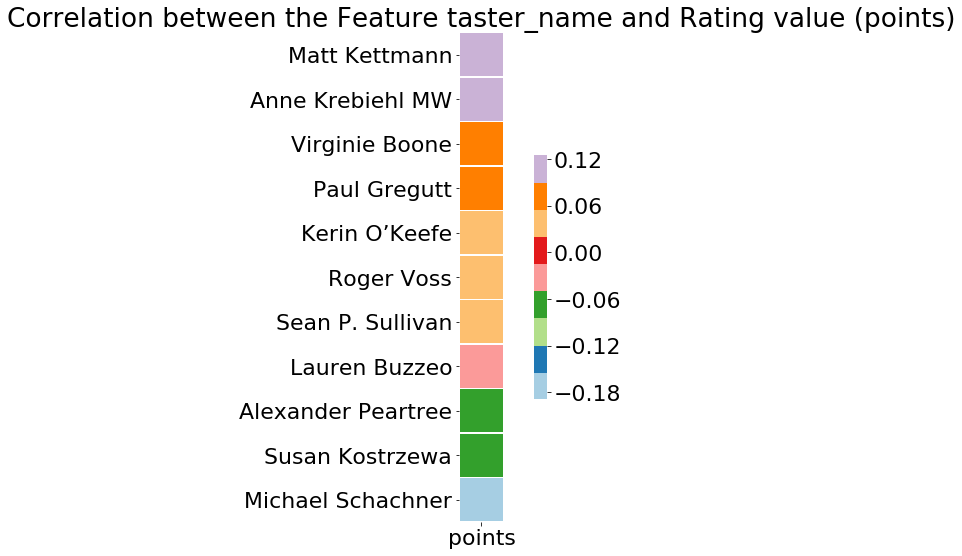

In [54]:
all_corr_sorted = all_corr_sorted.sort_values(by=["points"],ascending=False)
f, ax = plt.subplots(figsize=(11, 9))

name = "taster_name_"


country_rating = all_corr_sorted[(all_corr_sorted.index.str.contains(name))&(all_corr_sorted.index != "points")&(all_corr_sorted.index != "price")]

limit_rating = country_rating.points.abs().sort_values(ascending=False).iloc[10]
country_rating.index = country_rating.index.str.replace(name,"")
sns.heatmap(country_rating[country_rating.points.abs()>=limit_rating][['points']],cmap=cmap,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation between the Feature %s and Rating value (points)"%name[:-1]);

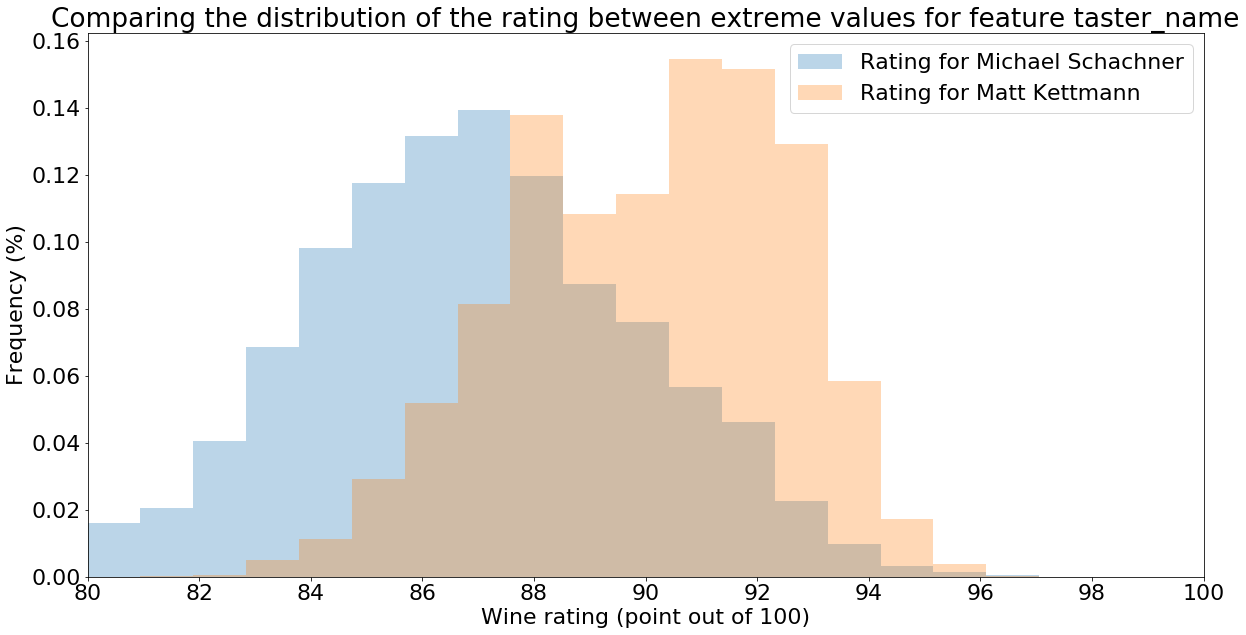

In [55]:
all_correlations = country_rating.points.sort_values().index
contender_one = all_correlations[0]
contender_two = all_correlations[-1]

dist_one = dataset[dataset[name[:-1]]==contender_one]
dist_two = dataset[dataset[name[:-1]]==contender_two]
points_no_price = dataset[dataset.price.isna()]
nb_bins = np.max(dist_one.points)-np.min(dist_one.points)+1
_,bins,_ = plt.hist(dist_one.points,density=True,alpha=0.3,bins=nb_bins,label="Rating for %s"%contender_one);
plt.hist(dist_two.points,density=True,alpha=0.3,bins=bins,label="Rating for %s"%contender_two);



plt.title("Comparing the distribution of the rating between extreme values for feature %s"%name[:-1])
plt.ylabel("Frequency (%)")
plt.xlabel("Wine rating (point out of 100)")
plt.xlim(80,100)
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(2))


Text(0.5,1,'Correlation between the Feature variety and Rating value (points)')

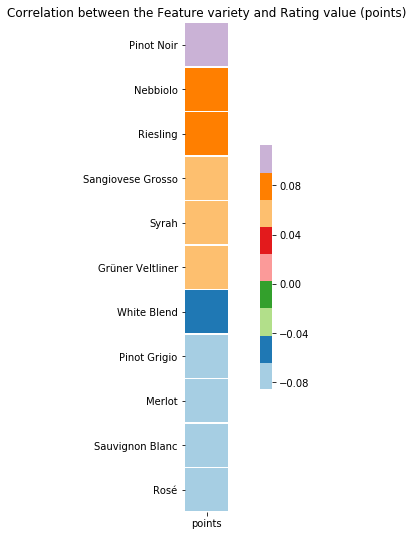

In [34]:
all_corr_sorted = all_corr_sorted.sort_values(by=["points"],ascending=False)
f, ax = plt.subplots(figsize=(11, 9))

name = "variety_"

country_rating = all_corr_sorted[(all_corr_sorted.index.str.contains(name))&(all_corr_sorted.index != "points")&(all_corr_sorted.index != "price")]

limit_rating = country_rating.points.abs().sort_values(ascending=False).iloc[10]
country_rating.index = country_rating.index.str.replace(name,"")
sns.heatmap(country_rating[country_rating.points.abs()>=limit_rating][['points']],cmap=cmap,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation between the Feature %s and Rating value (points)"%name[:-1])

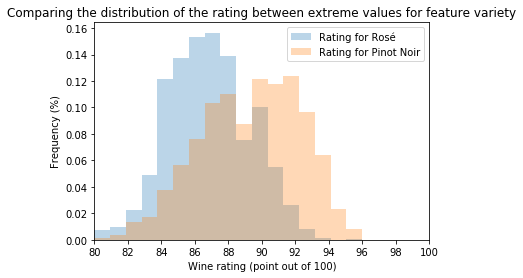

In [35]:
all_correlations = country_rating.points.sort_values().index
contender_one = all_correlations[0]
contender_two = all_correlations[-1]

dist_one = dataset[dataset[name[:-1]]==contender_one]
dist_two = dataset[dataset[name[:-1]]==contender_two]
points_no_price = dataset[dataset.price.isna()]
nb_bins = np.max(dist_one.points)-np.min(dist_one.points)+1
_,bins,_ = plt.hist(dist_one.points,density=True,alpha=0.3,bins=nb_bins,label="Rating for %s"%contender_one);
plt.hist(dist_two.points,density=True,alpha=0.3,bins=bins,label="Rating for %s"%contender_two);



plt.title("Comparing the distribution of the rating between extreme values for feature %s"%name[:-1])
plt.ylabel("Frequency (%)")
plt.xlabel("Wine rating (point out of 100)")
plt.xlim(80,100)
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(2))


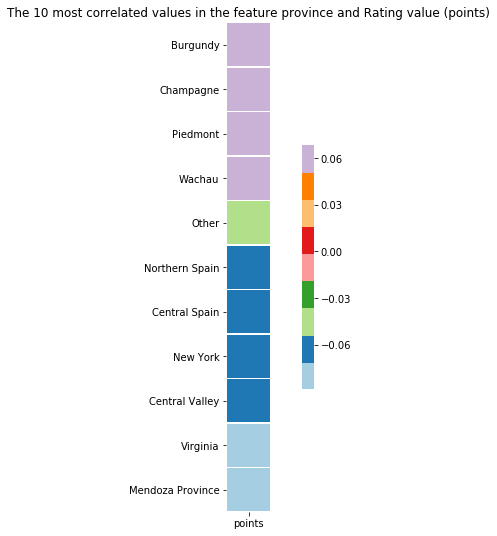

In [36]:
all_corr_sorted = all_corr_sorted.sort_values(by=["points"],ascending=False)
f, ax = plt.subplots(figsize=(11, 9))

name = "province_"

country_rating = all_corr_sorted[(all_corr_sorted.index.str.contains(name))&(all_corr_sorted.index != "points")&(all_corr_sorted.index != "price")]

limit_rating = country_rating.points.abs().sort_values(ascending=False).iloc[10]
country_rating.index = country_rating.index.str.replace(name,"")
sns.heatmap(country_rating[country_rating.points.abs()>=limit_rating][['points']],cmap=cmap,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("The 10 most correlated values in the feature %s and Rating value (points)"%name[:-1]);

Text(0.5,1,'Correlation between the Feature province and Rating value (points)')

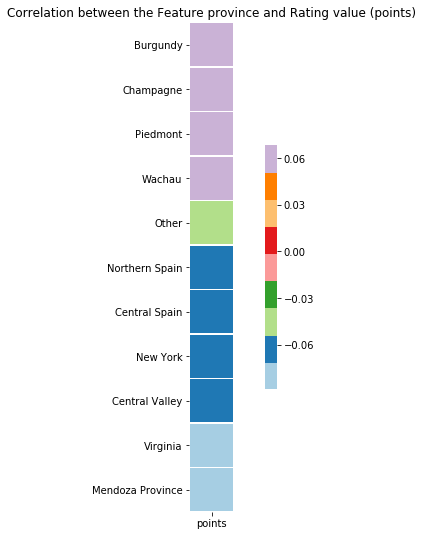

In [37]:
all_corr_sorted = all_corr_sorted.sort_values(by=["points"],ascending=False)
f, ax = plt.subplots(figsize=(11, 9))

name = "province_"

country_rating = all_corr_sorted[(all_corr_sorted.index.str.contains(name))&(all_corr_sorted.index != "points")&(all_corr_sorted.index != "price")]

limit_rating = country_rating.points.abs().sort_values(ascending=False).iloc[10]
country_rating.index = country_rating.index.str.replace(name,"")
sns.heatmap(country_rating[country_rating.points.abs()>=limit_rating][['points']],cmap=cmap,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation between the Feature %s and Rating value (points)"%name[:-1])

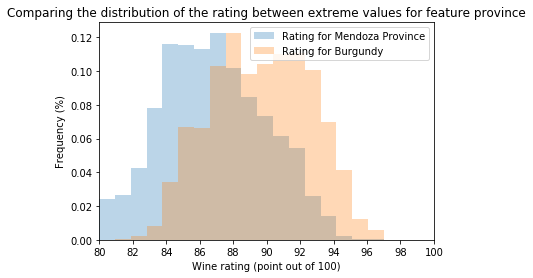

In [38]:
all_correlations = country_rating.points.sort_values().index
contender_one = all_correlations[0]
contender_two = all_correlations[-1]

dist_one = dataset[dataset[name[:-1]]==contender_one]
dist_two = dataset[dataset[name[:-1]]==contender_two]
points_no_price = dataset[dataset.price.isna()]
nb_bins = np.max(dist_one.points)-np.min(dist_one.points)+1
_,bins,_ = plt.hist(dist_one.points,density=True,alpha=0.3,bins=nb_bins,label="Rating for %s"%contender_one);
plt.hist(dist_two.points,density=True,alpha=0.3,bins=bins,label="Rating for %s"%contender_two);



plt.title("Comparing the distribution of the rating between extreme values for feature %s"%name[:-1])
plt.ylabel("Frequency (%)")
plt.xlabel("Wine rating (point out of 100)")
plt.xlim(80,100)
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(2))


Text(0.5,1,'Correlation between the Feature region_1 and Rating value (points)')

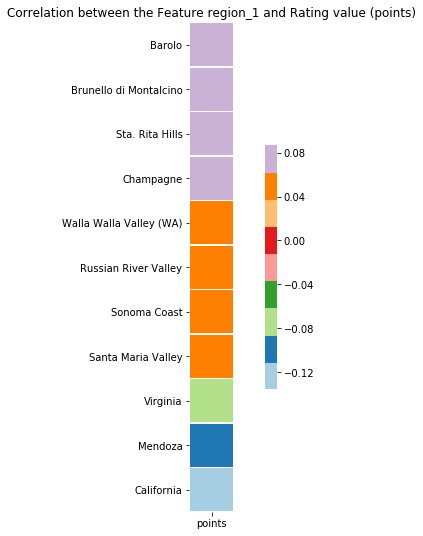

In [39]:
all_corr_sorted = all_corr_sorted.sort_values(by=["points"],ascending=False)
f, ax = plt.subplots(figsize=(11, 9))

name = "region_1_"

country_rating = all_corr_sorted[(all_corr_sorted.index.str.contains("region_1_"))&(all_corr_sorted.index != "points")&(all_corr_sorted.index != "price")]

limit_rating = country_rating.points.abs().sort_values(ascending=False).iloc[10]
country_rating.index = country_rating.index.str.replace("region_1_","")
sns.heatmap(country_rating[country_rating.points.abs()>=limit_rating][['points']],cmap=cmap,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation between the Feature %s and Rating value (points)"%name[:-1])

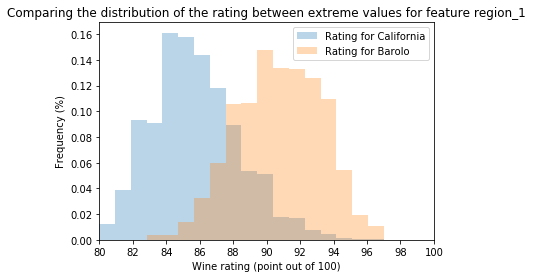

In [40]:
all_correlations = country_rating.points.sort_values().index
contender_one = all_correlations[0]
contender_two = all_correlations[-1]

dist_one = dataset[dataset[name[:-1]]==contender_one]
dist_two = dataset[dataset[name[:-1]]==contender_two]
points_no_price = dataset[dataset.price.isna()]
nb_bins = np.max(dist_one.points)-np.min(dist_one.points)+1
_,bins,_ = plt.hist(dist_one.points,density=True,alpha=0.3,bins=nb_bins,label="Rating for %s"%contender_one);
plt.hist(dist_two.points,density=True,alpha=0.3,bins=bins,label="Rating for %s"%contender_two);



plt.title("Comparing the distribution of the rating between extreme values for feature %s"%name[:-1])
plt.ylabel("Frequency (%)")
plt.xlabel("Wine rating (point out of 100)")
plt.xlim(80,100)
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(2))


This first review allowed us to confirm that there is a positive correlation between price and quality for the wine in this dataset.
It also allowed to look at how the relation between price and quality in some cases.

Looking at the influence of some categorical values, we could notice some major difference in the **points** features, in particular depending on the taster.

Being able to better measure those influence would woudl need further study.
In particular we could better understand if the rating for some reviewers are higher because they simple taste better wine or is it because they rate differently.

For the moment, we have defined "wine quality" using only one dimension, the feature **points**, we could get deeper insight using the **description** feature using NLP for example.